In [117]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [118]:
tb=pd.read_csv(r"C:\Users\Lucky Prem\Downloads\old projects\Churn_Modelling.csv")
tb

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [119]:
tb.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [120]:
tb.CreditScore.value_counts(), tb.EstimatedSalary.value_counts()

(CreditScore
 850    233
 678     63
 655     54
 705     53
 667     53
       ... 
 404      1
 351      1
 365      1
 417      1
 419      1
 Name: count, Length: 460, dtype: int64,
 EstimatedSalary
 24924.92     2
 101348.88    1
 55313.44     1
 72500.68     1
 182692.80    1
             ..
 120893.07    1
 188377.21    1
 55902.93     1
 4523.74      1
 38190.78     1
 Name: count, Length: 9999, dtype: int64)

## Data Cleaning

In [121]:
tb_new=tb[['CreditScore','Geography','Gender','Age','Exited']]
tb_new

,CreditScore,Geography,Gender,Age,Exited
0,619,France,Female,42,1
1,608,Spain,Female,41,0
2,502,France,Female,42,1
3,699,France,Female,39,0
4,850,Spain,Female,43,0
...,...,...,...,...,...
9995,771,France,Male,39,0
9996,516,France,Male,35,0
9997,709,France,Female,36,1
9998,772,Germany,Male,42,1


In [122]:
tb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CreditScore  10000 non-null  int64 
 1   Geography    10000 non-null  object
 2   Gender       10000 non-null  object
 3   Age          10000 non-null  int64 
 4   Exited       10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


In [123]:
# for i in range(tb_new.shape[1]):
#     print(i)
# for i in tb_new.iloc[:,1]:
#     print(i)
# tb_new.iloc[:,1]
# tb_new.iloc[:,0].std()
tb_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Exited'], dtype='object')

In [124]:
def find_ano2(data):
    t_anomaly=[]
    cols=list(data.columns)
    try:
        for i in range(data.shape[1]):
            if data.iloc[:,i].dtype=='int64' or data.iloc[:,i].dtype=='float64':

                data_std= data.iloc[:,i].std()
                data_mean= data.iloc[:,i].mean()
    
                ano_cutoff= 4*data_std
    
                lowerl= data_mean-ano_cutoff
                upperl= data_mean+ano_cutoff
    
                anomaly=[]
            
                for outlier in data.iloc[:,i]:
                    if (outlier > upperl) or (outlier < lowerl):
                        anomaly.append(outlier)
                        
                if len(anomaly)==0: #handles empty list/anomaly
                        t_anomaly.append(0) 
                else:
                        t_anomaly.append((anomaly))
                                     
            else: 
                t_anomaly.append(0)
                
    except:
            print("used 1D data not 2D, find_ano(data) applied")
            def find_ano(data):
   
                data_std= data.std()
                data_mean= data.mean()
    
                ano_cutoff=4*data_std #covering 100% of the values
    
                lowerl=data_mean-ano_cutoff
                upperl=data_mean+ano_cutoff
    
                anomaly=[]
    
                for outlier in data:
                    if (outlier > upperl) or (outlier < lowerl):
                        anomaly.append(outlier)
                return anomaly
            t_anomaly.append((find_ano(data)))
            
            
    return  dict(zip(cols,t_anomaly))
            

In [125]:
find_ano2(tb_new)

{'CreditScore': 0,
 'Geography': 0,
 'Gender': 0,
 'Age': [82, 88, 85, 84, 84, 81, 92, 92, 81, 81, 81, 83],
 'Exited': 0}

In [126]:
tb_new['Age'].isin([82, 88, 85, 84, 84, 81, 92, 92, 81, 81, 81, 83]).unique()

array([False,  True])

In [127]:
# ul=tb_new.Age.mean()+4*tb_new.Age.std()
# ll=tb_new.Age.mean()-4*tb_new.Age.std()
# tb_new=tb_new[ ~((tb_new.Age<ll) | (tb_new.Age>ul)) ]
tb_new=tb_new[tb_new['Age'].isin([82, 88, 85, 84, 84, 81, 92, 92, 81, 81, 81, 83])==False]
tb_new

,CreditScore,Geography,Gender,Age,Exited
0,619,France,Female,42,1
1,608,Spain,Female,41,0
2,502,France,Female,42,1
3,699,France,Female,39,0
4,850,Spain,Female,43,0
...,...,...,...,...,...
9995,771,France,Male,39,0
9996,516,France,Male,35,0
9997,709,France,Female,36,1
9998,772,Germany,Male,42,1


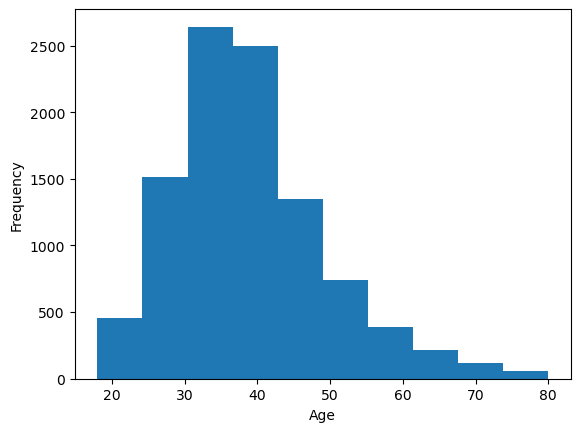

In [128]:
tb_new.Age.plot.hist(xlabel='Age');

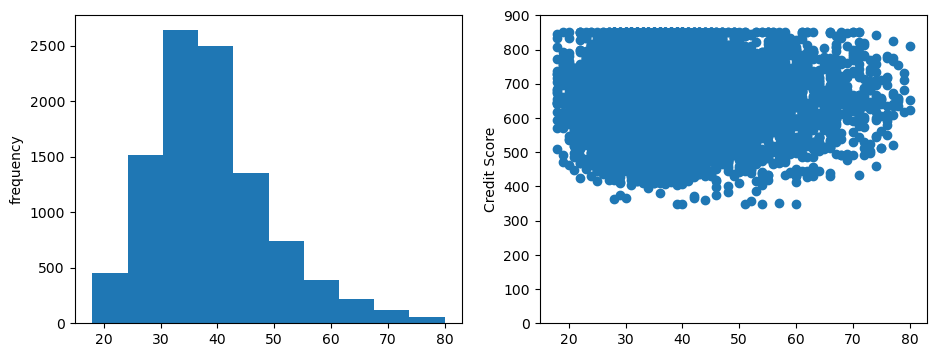

In [129]:
fg, ax= plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
ax[0].hist(tb_new.Age);
ax[1].scatter(tb_new.Age, tb_new.CreditScore);
ax[1].set(ylim=(0,900))
ax[0].set_ylabel('frequency'), ax[1].set_ylabel('Credit Score');

## Categorical Data Analysis

In [130]:
tb_new2= tb_new.drop([tb_new.columns[0],tb_new.columns[3]], axis=1)
tb_new2

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


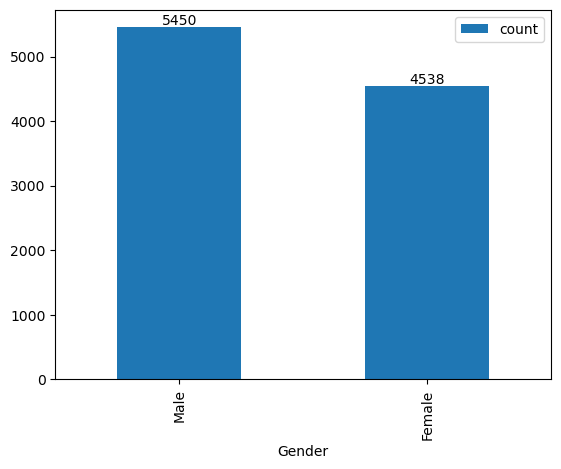

In [131]:
ax=tb_new2.Gender.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], label='counts');
ax.legend();

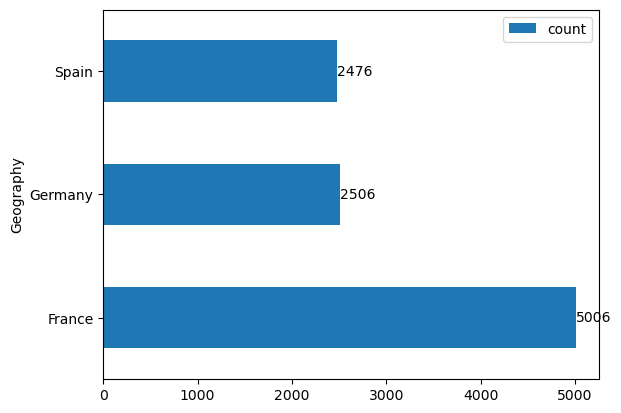

In [132]:
ax= tb_new2.Geography.value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0]);
ax.legend();

In [133]:
(tb_new2.Geography.value_counts()/len(tb_new2.Geography))*100

Geography
France     50.120144
Germany    25.090108
Spain      24.789748
Name: count, dtype: float64

No Significnce of Gender but we have huge Market size in France and then equaly in Germany, Spain

# Univariate analysis

In [134]:
tb_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CreditScore  9988 non-null   int64 
 1   Geography    9988 non-null   object
 2   Gender       9988 non-null   object
 3   Age          9988 non-null   int64 
 4   Exited       9988 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 468.2+ KB


In [155]:
tb_new

,CreditScore,Geography,Gender,Age,Exited,IsActiveMember
0,619,France,Female,42,1,1
1,608,Spain,Female,41,0,1
2,502,France,Female,42,1,0
3,699,France,Female,39,0,0
4,850,Spain,Female,43,0,1
...,...,...,...,...,...,...
9995,771,France,Male,39,0,0
9996,516,France,Male,35,0,1
9997,709,France,Female,36,1,1
9998,772,Germany,Male,42,1,0


In [159]:
tb_new = pd.merge(tb_new, tb[['IsActiveMember']], left_index=True, right_index=True, how='left')
tb_new

,CreditScore,Geography,Gender,Age,Exited,IsActiveMember
0,619,France,Female,42,1,1
1,608,Spain,Female,41,0,1
2,502,France,Female,42,1,0
3,699,France,Female,39,0,0
4,850,Spain,Female,43,0,1
...,...,...,...,...,...,...
9995,771,France,Male,39,0,0
9996,516,France,Male,35,0,1
9997,709,France,Female,36,1,1
9998,772,Germany,Male,42,1,0


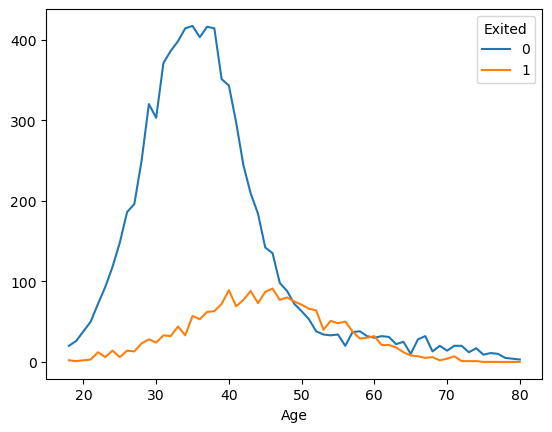

In [170]:
pd.set_option('display.max.rows', None)
pd.crosstab(index=tb_new.Age,columns=tb_new.Exited).plot();

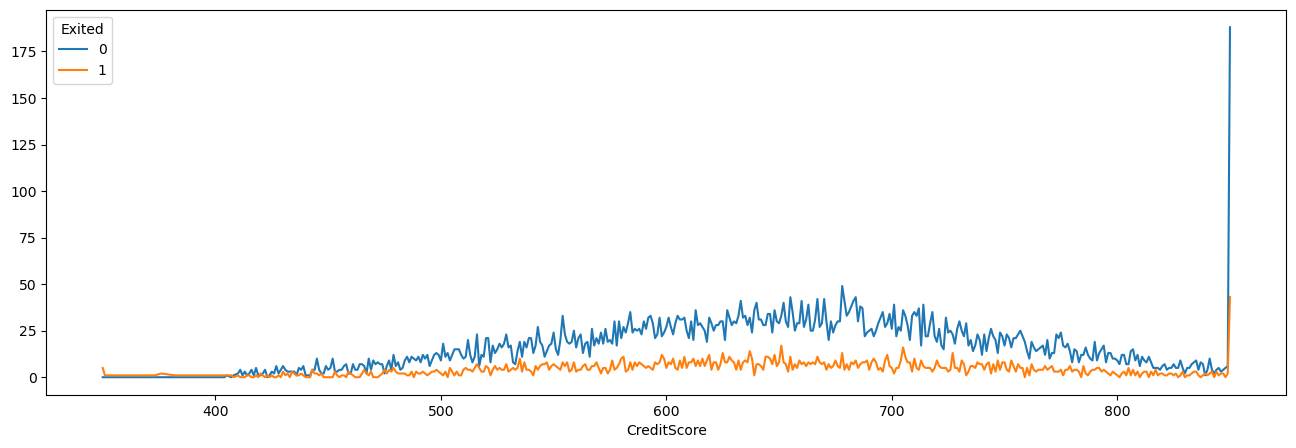

In [205]:
pd.crosstab(index=tb_new.CreditScore,columns=tb_new.Exited).plot(figsize=(16, 5));

In [172]:
for i, val in enumerate(tb_new.drop(columns=['Exited','Age'])): #enumerate means number ke sath
     print(i, val)

0 CreditScore
1 Geography
2 Gender
3 IsActiveMember


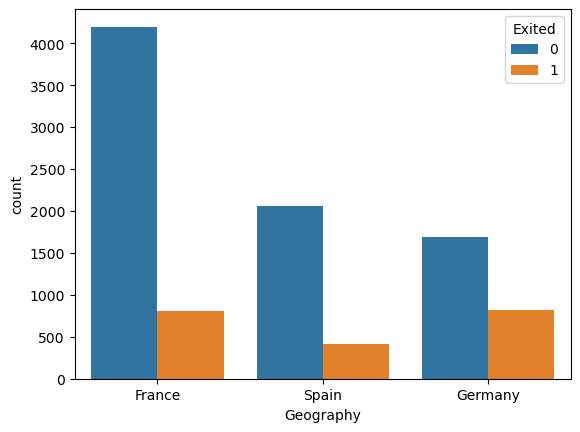

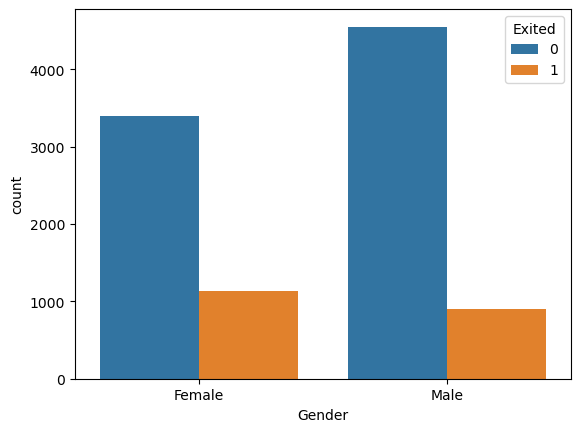

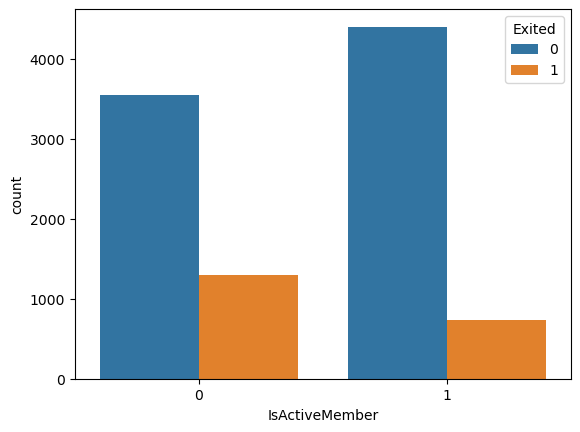

In [173]:
for i, val in enumerate(tb_new.drop(columns=['CreditScore','Exited','Age'])):
    plt.figure()
    sb.countplot(data=tb_new, x=val, hue='Exited') #hue is the dependent variable y whereas x is categorical column

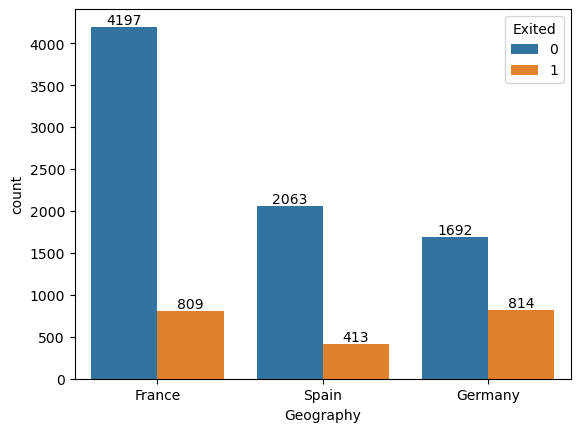

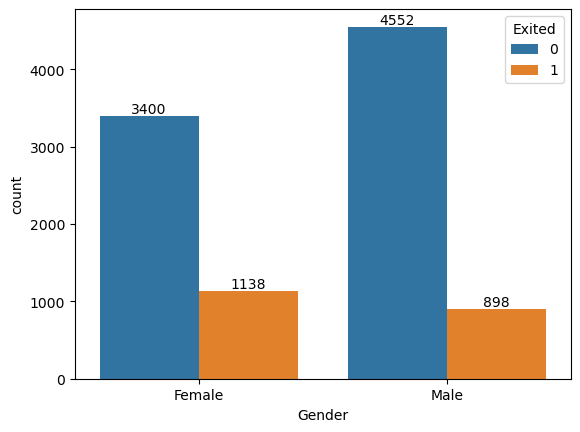

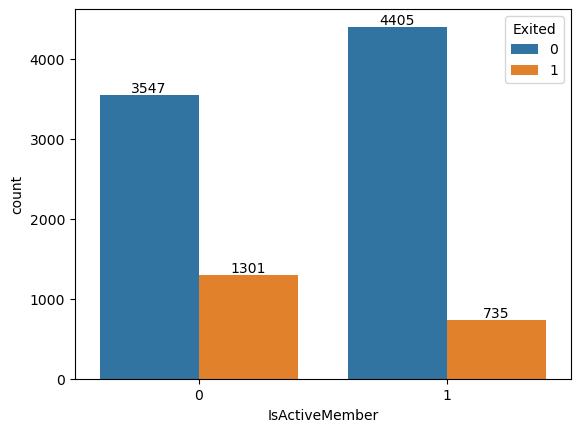

In [202]:
for col in tb_new.drop(columns=['CreditScore','Exited','Age']):
    plt.figure()
    ax = sb.countplot(data=tb_new, x=col, hue='Exited')
    # inside loop through the ax.containers and add labels to each bar#iterate through the BarContainer objects in the containers list. 
    for c in ax.containers:
    #   print(c)
        ax.bar_label(c)

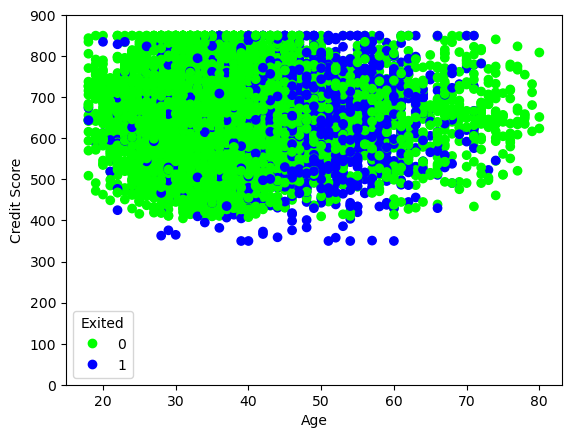

In [208]:
fg, ax= plt.subplots()
a1=ax.scatter(x=tb_new.Age,y=tb_new.CreditScore,c=tb_new.Exited, cmap='brg_r')
ax.set(ylim=(0,900), xlabel='Age',ylabel='Credit Score')
ax.legend(*a1.legend_elements(), title='Exited');

In [141]:
Ger=814/(814+1692)
Sp=413/2063
print(Ger, Sp)

0.32482043096568236 0.2001938923897237


In [209]:
In_c=(1301/3547)*100
Ac_c=(735/4405)*100
print(In_c,Ac_c)

36.67888356357486 16.685584562996596


People in Germany is more likely(32%) to churn than Spain(16%)
Gender have not much impact or no conclusion from Gender alone is important 

# Bivariate analysis

<Axes: xlabel='Gender', ylabel='Count'>

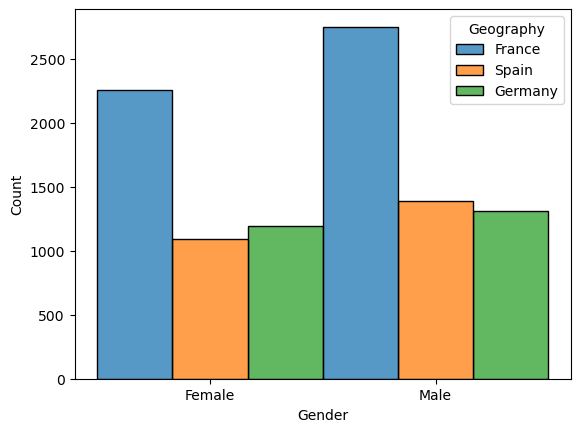

In [143]:
sb.histplot(data=tb_new, x='Gender', hue='Geography',multiple='dodge')

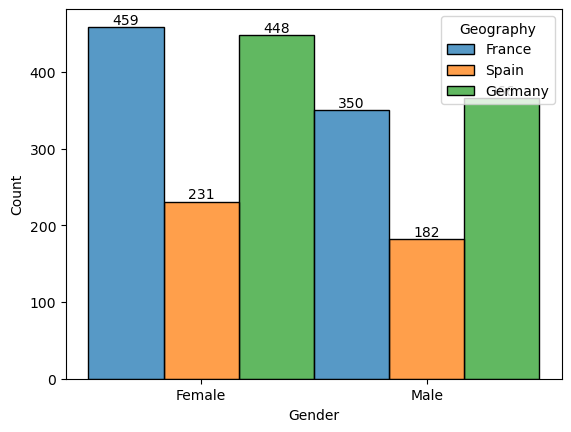

In [144]:
tb_new1= tb_new[tb_new.Exited==1]
ax=sb.histplot(data=tb_new1, x='Gender', hue='Geography', multiple='dodge')
for c in ax.containers:
    ax.bar_label(c)

In [145]:
Tf=tb_new.Gender[tb_new['Gender']=='Female'].count()
Tm=tb_new.Gender[tb_new['Gender']=='Male'].count()
F=(459+231+448)/Tf
M=(350+182+366)/Tm
print(F*100, M*100)

25.0771264874394 16.477064220183486


Female are more churn than male for each regions|25%=1out4 female ratio is high out of female population, compared to men 16%=1out6

# Numerical analysis

In [212]:
#correlation plot :ranges -1 0 1

# select only the numeric columns
tb_numeric = tb.select_dtypes(np.number)

# compute the correlation matrix
tb_numeric.drop('RowNumber', axis=1).corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


No of Products & Balance -vly corr while Age & Exited are +vly corr

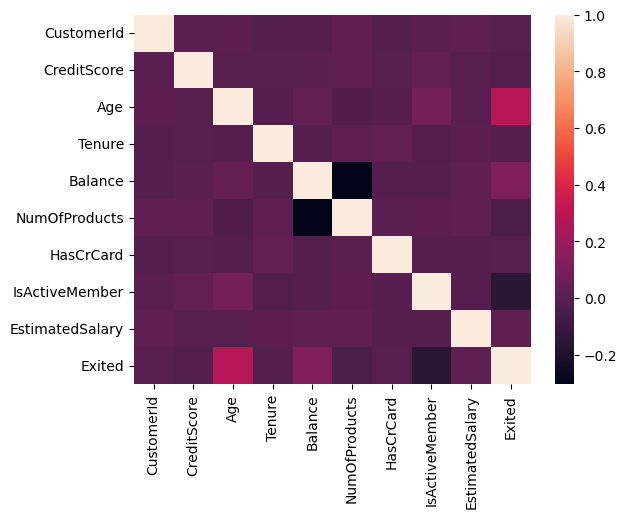

In [214]:
sb.heatmap(tb_numeric.drop('RowNumber', axis=1).corr());

In [217]:
# tb.drop('RowNumber', axis=1, inplace=True)
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [218]:
tb.Age.unique().max()

92

In [223]:
pd.reset_option('display.max.rows')
tb['Age'].value_counts().sort_values(ascending=False)

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [224]:
bins=0,18,36,54,72,90,108
labels=['18','36','54','72','90','108']
tb_new.Age_bin=pd.cut(tb.Age,bins,labels=labels, include_lowest=True)

In [225]:
tb_new.Age_bin

0       54
1       54
2       54
3       54
4       54
        ..
9995    54
9996    36
9997    36
9998    54
9999    36
Name: Age, Length: 10000, dtype: category
Categories (6, object): ['18' < '36' < '54' < '72' < '90' < '108']

Age     18    36    54   72  90
Exited                         
0       20  4189  3214  458  71
1        2   398  1295  339   2


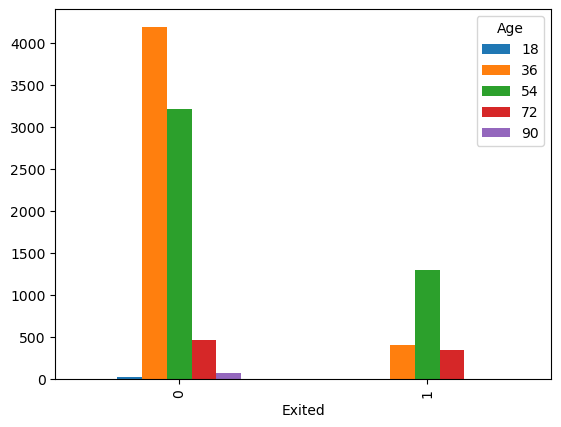

In [246]:
print(pd.crosstab(tb_new.Exited,tb_new.Age_bin))
pd.crosstab(tb_new.Exited,tb_new.Age_bin).plot(kind='bar');

In [232]:
print(1295/3214,"\n", 339/458)

0.4029247044181705 
 0.740174672489083


for age between 18 to 36, churn %age is less<10% while for above ages 36-54 & 54-72(Our Max Custumers), churn %age ratio is high 40% & 75% respectively then for old its again very less <1%

In [233]:
tb['Age'].value_counts().sort_index(ascending=True)

Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64

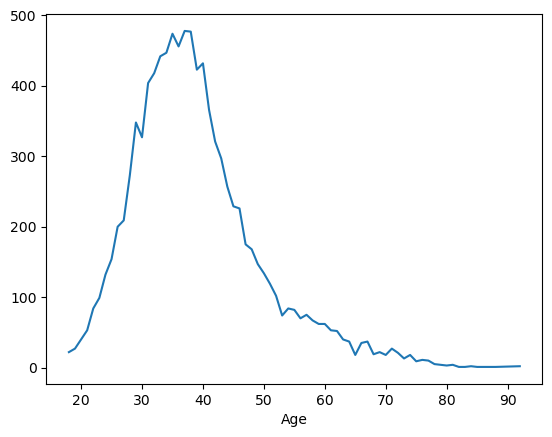

In [247]:
tb['Age'].value_counts().sort_index(ascending=True).plot();

<Axes: xlabel='Age'>

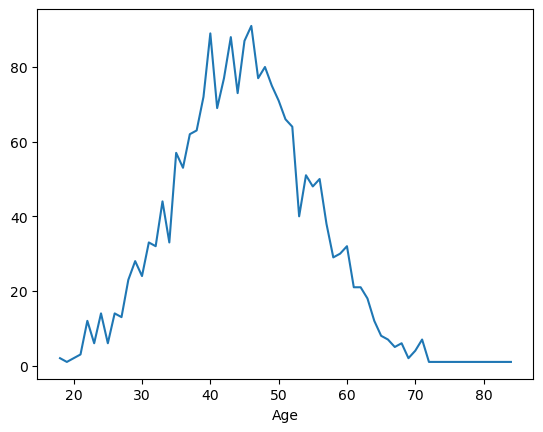

In [235]:
tb1=tb.loc[tb['Exited']==1]
tb1['Age'].value_counts().sort_index(ascending=True).plot()

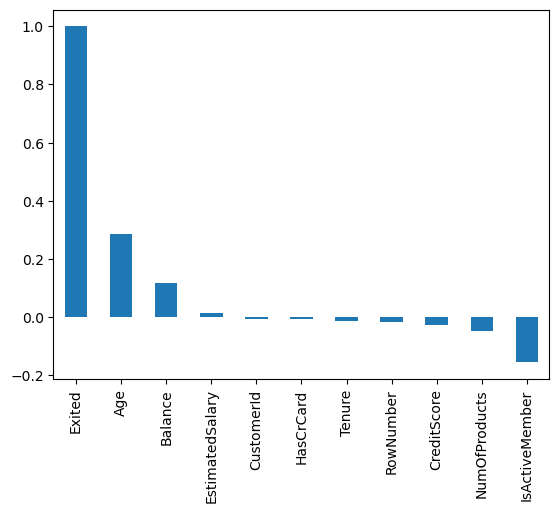

In [248]:
plt.figure()
tb_numeric.corr()['Exited'].sort_values(ascending=False).plot(kind='bar');

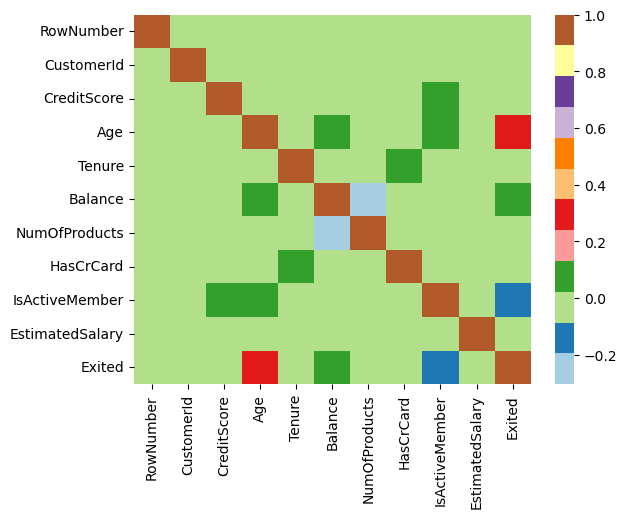

In [243]:
plt.figure()
sb.heatmap(tb_numeric.corr(), cmap='Paired');

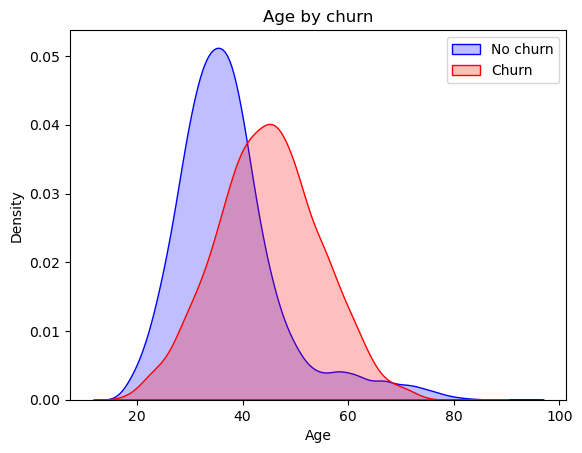

In [242]:
Tol=sb.kdeplot(tb, x=tb.Age[tb['Exited']==0], color='Blue', shade=True) 
Tol=sb.kdeplot(tb, x=tb.Age[tb.Exited==1], color='Red', shade=True)
Tol.legend(["No churn", "Churn"])
Tol.set_ylabel
Tol.set_xlabel
Tol.set_title('Age by churn');

Age is an important factor & the higher age people more likely to churning 

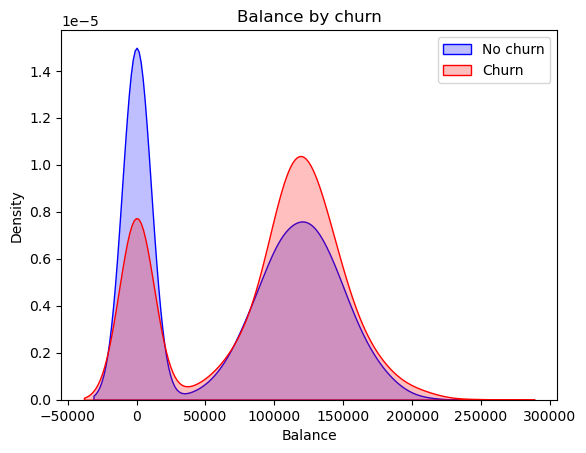

In [241]:
Tol=sb.kdeplot(tb.Balance[tb['Exited']==0], color='Blue', shade=True) 
Tol=sb.kdeplot(tb.Balance[tb.Exited==1], color='Red', shade=True)
Tol.legend(["No churn", "Churn"])
Tol.set_ylabel
Tol.set_xlabel
Tol.set_title('Balance by churn');

less people churn having less amount <25k & high balance people >25K are churning more